In [ ]:
!pip install annoy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from annoy import AnnoyIndex
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("product reviews.csv" , sep=',')

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
193,194,B0028C44Z0,A19NGYCQ1NCF3W,S. Haney,2,2,5,1323820800,Great for after lunch,These little guys are tasty and refreshing.<br...
194,195,B0028C44Z0,A32DDKLY942A84,"PrinterCPE ""damnsilly1""",2,2,4,1284249600,"Nice little mints, but pricey.","I like these better than the regular Altoids, ..."
195,196,B0028C44Z0,A3B6S35IUGOGW4,Rutt10,1,1,5,1300406400,Altoids mini mints tins,These little tins of sugar free mine mints wer...
196,197,B0028C44Z0,AI7O5C9KBVSTF,i&#60;3pnutbutter,3,4,5,1274054400,Altoids Smalls-Wintergreen,"Pros:<br />+packaging, shipping, price<br />+s..."
197,198,B0028C44Z0,A4LL4KXLRBQHQ,stillgoinstrong,2,3,3,1278460800,Sugarfree...,Be careful not to eat too many of them in one ...


In [ ]:
data.shape

(198, 10)

In [ ]:
data.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      198 non-null    int64 
 1   ProductId               198 non-null    object
 2   UserId                  198 non-null    object
 3   ProfileName             198 non-null    object
 4   HelpfulnessNumerator    198 non-null    int64 
 5   HelpfulnessDenominator  198 non-null    int64 
 6   Score                   198 non-null    int64 
 7   Time                    198 non-null    int64 
 8   Summary                 198 non-null    object
 9   Text                    198 non-null    object
dtypes: int64(5), object(5)
memory usage: 15.6+ KB


In [ ]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,198.000000,198.000000,198.000000,198.000000,1.980000e+02
mean,99.500000,1.328283,1.560606,4.338384,1.303209e+09
std,57.301832,2.629066,2.785726,1.162721,4.790078e+07
min,1.000000,0.000000,0.000000,1.000000,1.107821e+09
25%,50.250000,0.000000,0.000000,4.000000,1.287857e+09
50%,99.500000,0.000000,1.000000,5.000000,1.320624e+09
75%,148.750000,2.000000,2.000000,5.000000,1.335118e+09
max,198.000000,19.000000,19.000000,5.000000,1.351210e+09


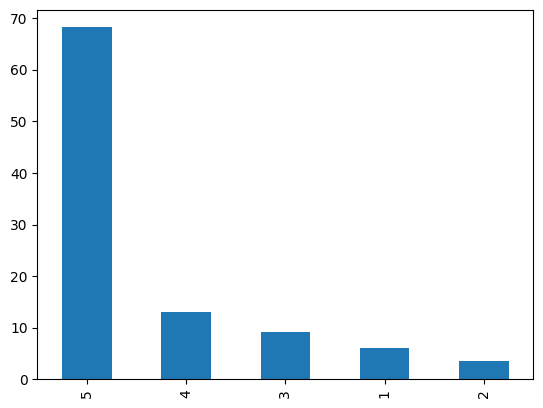

In [ ]:
rating_pct = (data['Score'].value_counts()/len(data) * 100).plot.bar()
plt.show()


In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
137,138,B002SRYRE8,A21E0OJ4DSKXNA,Smileface,0,0,5,1342051200,Happy Face,Delicious. I cannot get Australian ginger wher...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
66,67,B005DUM9UQ,AEFIZIJ1FK1BK,Doug,0,0,5,1345161600,Low Carb Alternative to Gatorade,For those of us on a low carb diet these littl...
138,139,B002SRYRE8,A1FJJQA34W0F4K,"Gettin Real ""gettin real""",0,0,5,1329177600,Simply the BEST!,I keep trying other brands.... cheaper brands....
104,105,B004K2IHUO,AL3E5V6MXO9B0,pionex1796,0,0,5,1326412800,Loved these Tartlets,What a nice alternative to an apple pie. Love ...
...,...,...,...,...,...,...,...,...,...,...
106,107,B004K2IHUO,A1ZKFQLHFZAEH9,"S. J. Monson ""world citizen""",2,8,3,1236384000,disappointing,not what I was expecting in terms of the compa...
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
92,93,B0019CW0HE,ABG53EBZBKD23,"J. Romagnoli ""*jroma""",0,0,5,1333929600,Mmmmm Mmmmm good.,This food is great - all ages dogs. I have a ...
179,180,B005CJVVJ8,A3O8ZE8BHREE0W,Tom Falcon,8,8,4,1314316800,"relaxing, almost like something you smoke",Couldn't believe it when told how relaxing thi...


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(train_data['Text'])

In [ ]:
model = NearestNeighbors(n_neighbors=6, metric='cosine')
model.fit(tfidf_matrix)


NearestNeighbors(metric='cosine', n_neighbors=6)

In [ ]:
def get_similar_products(product_id, N=5):
    index = data[data['ProductId'] == product_id].index[0]
    _, indices = model.kneighbors(tfidf_matrix[index], n_neighbors=N+1)
    product_indices = indices[0][1:]
    return data.iloc[product_indices]